In [126]:
import random
%reload_ext autoreload

from evoscape.landscapes import Landscape
from evoscape.modules import Node, UnstableNode, Center, NegCenter
from evoscape.landscape_visuals import *
from evoscape.morphogen_regimes import mr_const, mr_sigmoid, mr_piecewise

/Users/victoria/Code/landscapes/src/evoscape/landscape_visuals.py:136: RuntimeWarning: invalid value encountered in divide
  direction /= np.linalg.norm(direction)
/Users/victoria/Code/landscapes/src/evoscape/landscapes/landscape_class.py:275: RuntimeWarning: invalid value encountered in divide
  prob = (prob.T / np.sum(prob, axis=1)).T
/Users/victoria/Code/landscapes/src/evoscape/landscapes/landscape_class.py:97: RuntimeWarning: overflow encountered in square
  r = np.sqrt(xr ** 2 + yr ** 2)
/Users/victoria/Code/landscapes/src/evoscape/landscapes/landscape_class.py:100: RuntimeWarning: overflow encountered in power
  derivs = self.A0 * np.array((-(x-self.x0[0]) ** 3, -(y-self.x0[1]) ** 3)) + (np.sum(w * dx, axis=0), np.sum(w * dy, axis=0))
/Users/victoria/Code/landscapes/src/evoscape/landscapes/landscape_class.py:67: RuntimeWarning: invalid value encountered in multiply
  dx = J[0][0] * x + J[0][1] * y
/Users/victoria/Code/landscapes/src/evoscape/landscapes/landscape_class.py:68: Runt

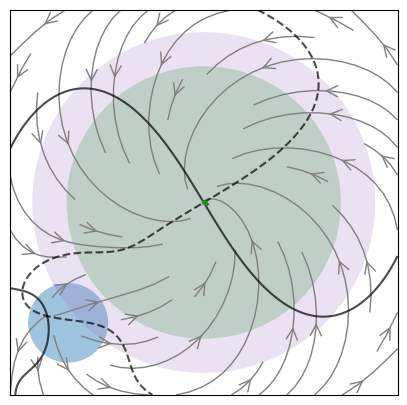

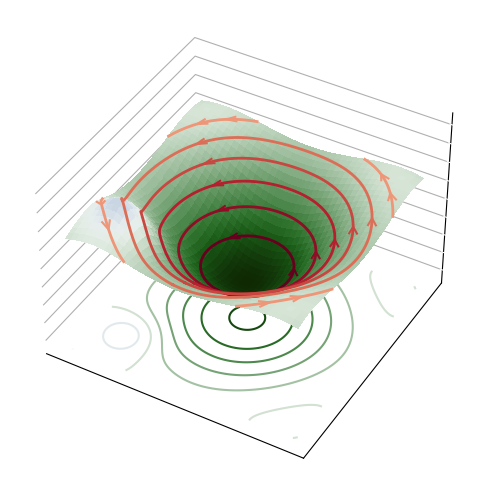

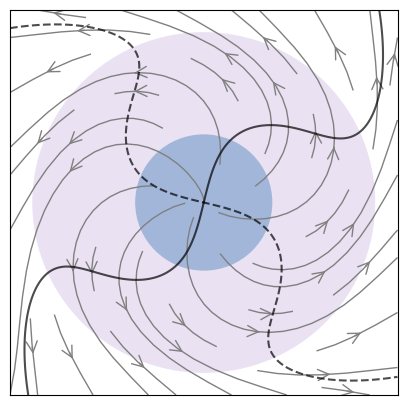

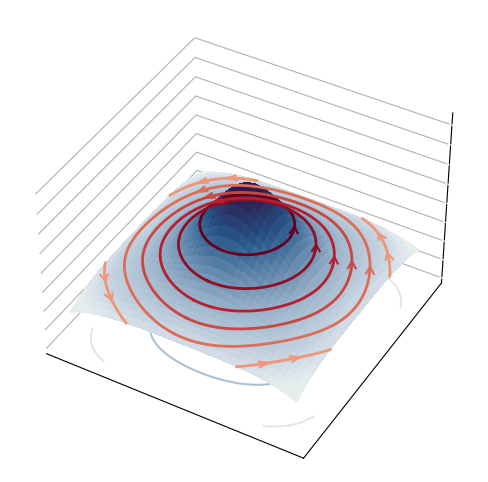

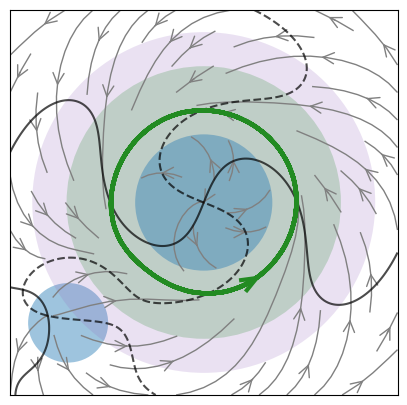

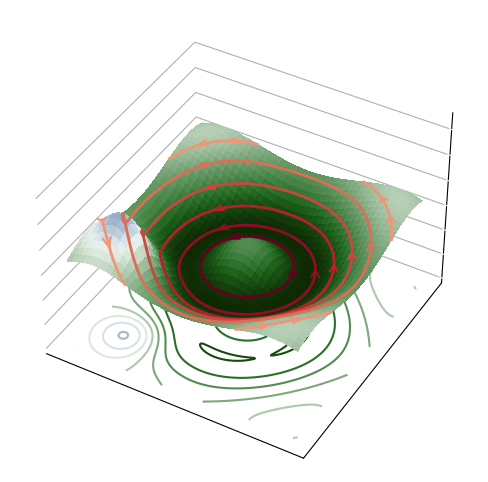

In [193]:
# Inverted landscape (integrate the unstable cycle)
%autoreload

factor = 1.

M1 = UnstableNode(-2.8, -2.5, 3., 0.7)
M2 = Node(0., 0., 1., 1.6*1.5)
M3 = Center(0., 0., 0.6, 3.)
M4 = UnstableNode(0., 0., 2.5, 1.2*factor)

module_lists = ( [M1, M2, M3], [M4, M3], [M1, M2, M3, M4])
for module_list in module_lists:
    l = Landscape(module_list, A0 = -0.01, regime=mr_sigmoid, n_regimes=1, morphogen_times=(0.,))
    # print(l)
    
    L = 4.
    npoints = 201
    q = np.linspace(-L, L, npoints)
    xx, yy = np.meshgrid(q, q, indexing='xy')
    fig = visualize_landscape_t(l, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 140., 351), traj_init_cond=(-2.5,-1.1), traj_start=10)
    fig = visualize_potential(l, xx, yy, 0, color_scheme='fp_types', rot_contour=True, elev=40, cmap_center=-1)
    l.init_cells(1, (-2.5, -1.1))
    traj, states = l.run_cells(0., 70., 351)
    

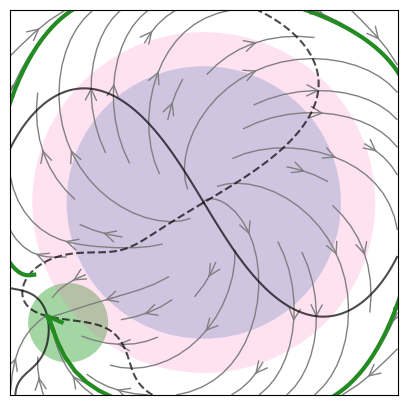

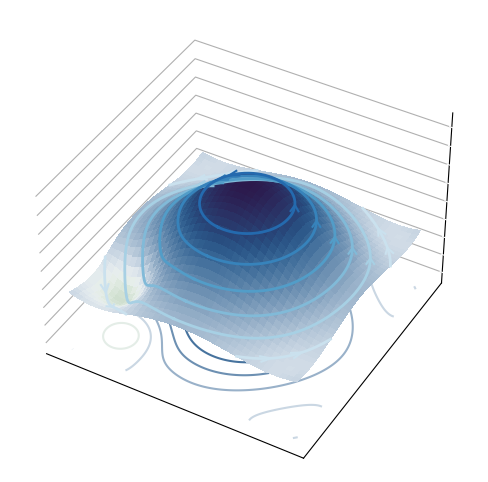

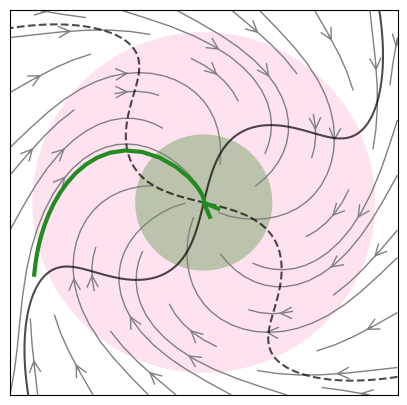

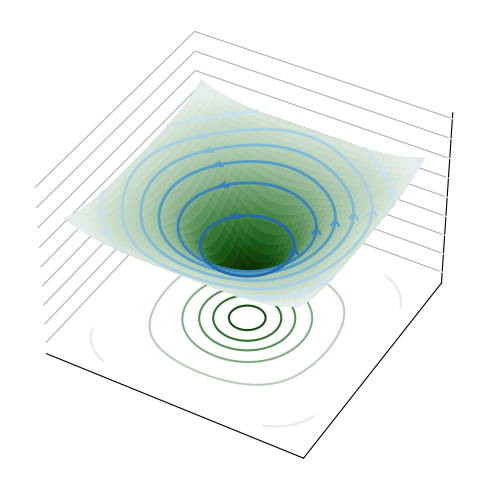

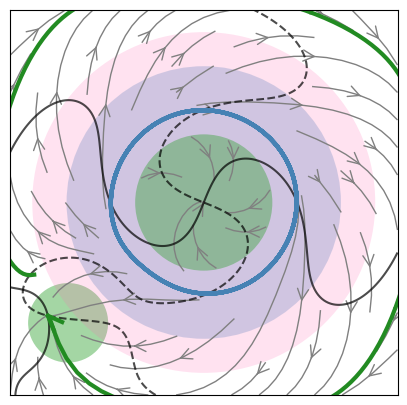

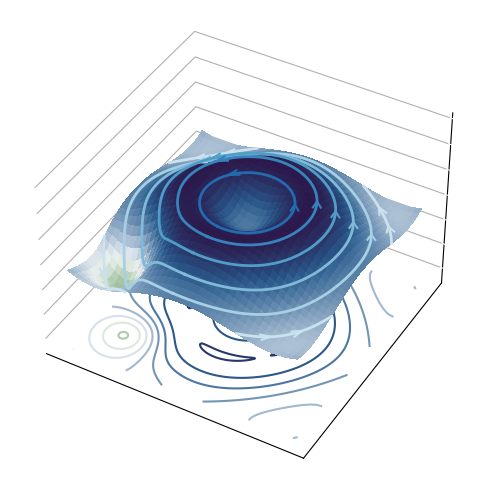

In [194]:
# Normal landscape 

M1 = Node(-2.8, -2.5, 3., 0.7)
M2 = UnstableNode(0., 0., 1., 1.6*1.5, tau=1.)
M3 = NegCenter(0., 0., 0.6, 3., tau=1.)
M4 = Node(0., 0., 2.5, 1.2*factor, tau=1)
module_lists = ( [M1, M2, M3], [M4, M3], [M1, M2, M3, M4])
for module_list in module_lists:
    l = Landscape(module_list, A0 = 0.01, regime=mr_sigmoid, n_regimes=1, morphogen_times=(0.,))
    # print(l)
    
    L = 4.
    npoints = 201
    q = np.linspace(-L, L, npoints)
    xx, yy = np.meshgrid(q, q, indexing='xy')
    fig = visualize_landscape_t(l, xx, yy, 0., color_scheme='fp_types', traj_times=(0., 60., 301), traj_init_cond=(-3.5, -1.5), traj_start=0)
    ax = plt.gca()
    if len(module_list) == 4:
        ax.plot(traj[0, 0, 20:], traj[1, 0, 20:], lw=3, c='steelblue')
    fig = visualize_potential(l, xx, yy, 0, color_scheme='fp_types', rot_contour=True, elev=40, cmap_center=1.)
    
    # plt.show()